# Hands-on Diabetes Prediction using ANN

### Import Required Library and Module

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.2.0


### Helper Funtion to Plot Training Result

In [ ]:
from matplotlib import pyplot
%matplotlib inline

def plot_model_history(model_history):
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()

### Download Dataset

In [ ]:
!wget https://raw.githubusercontent.com/project303/Deep-Learning-201/master/dataset/pima-indians-diabetes-data.csv

--2020-05-21 16:43:43--  https://raw.githubusercontent.com/project303/Deep-Learning-201/master/dataset/pima-indians-diabetes-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes-data.csv’

pima-indians-diabet 100%[===================>]  23.31K  --.-KB/s    in 0.01s   

2020-05-21 16:43:43 (2.26 MB/s) - ‘pima-indians-diabetes-data.csv’ saved [23873/23873]



### Read as Pandas Dataframe

In [ ]:
dataframe = pd.read_csv("/content/pima-indians-diabetes-data.csv")

### Simple EDA

In [ ]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataframe.shape

(768, 9)

In [ ]:
dataframe.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [ ]:
df_label = dataframe['Outcome']
df_features = dataframe.drop('Outcome', 1)
df_features.replace('?', -99999, inplace=True)

df_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
df_features.shape

(768, 8)

In [ ]:
df_label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Convert Category into 2 Class

In [ ]:
label = []
for lab in df_label:
    if lab == 1:
        label.append([1, 0])  # class 1
    elif lab == 0:
        label.append([0, 1])  # class 0

### Convert Dataframe to Array

In [ ]:
data = np.array(df_features)
label = np.array(label)
print(data.shape,label.shape)

(768, 8) (768, 2)


In [ ]:
data[1]

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ])

In [ ]:
label[1]

array([0, 1])

### Split Data Into Training Dataset And Test Dataset

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)
print(train_data.shape, test_data.shape)


(614, 8) (154, 8)


### Create Model

In [ ]:
## create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


### Setup Training Optimizer

In [ ]:
## set training optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train The Model

In [ ]:
import os
import datetime
import time

start = time.time()
history = model.fit(train_data, train_label, 
                    epochs=200, 
                    batch_size=10, 
                    validation_data=(test_data, test_label)
                    )

end = time.time()
print("Model took {:2.0f} seconds to train".format((end - start)))

Train on 614 samples, validate on 154 samples
Epoch 1/200
614/614 [==============================] - 0s 326us/step - loss: 5.3021 - accuracy: 0.6515 - val_loss: 5.4775 - val_accuracy: 0.6429
Epoch 2/200
614/614 [==============================] - 0s 146us/step - loss: 5.3117 - accuracy: 0.6515 - val_loss: 5.4775 - val_accuracy: 0.6429
Epoch 3/200
614/614 [==============================] - 0s 158us/step - loss: 5.2900 - accuracy: 0.6547 - val_loss: 5.4775 - val_accuracy: 0.6429
Epoch 4/200
614/614 [==============================] - 0s 161us/step - loss: 5.3004 - accuracy: 0.6531 - val_loss: 5.4775 - val_accuracy: 0.6429
Epoch 5/200
614/614 [==============================] - 0s 140us/step - loss: 5.2944 - accuracy: 0.6531 - val_loss: 5.4775 - val_accuracy: 0.6429
Epoch 6/200
614/614 [==============================] - 0s 158us/step - loss: 5.2940 - accuracy: 0.6531 - val_loss: 5.4775 - val_accuracy: 0.6429
Epoch 7/200
614/614 [==============================] - 0s 138us/step - loss: 5.2937 

### View Training Result

In [ ]:
for key in history.history.keys():
    print(key)


val_loss
val_accuracy
loss
accuracy


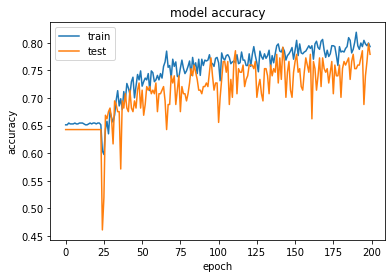

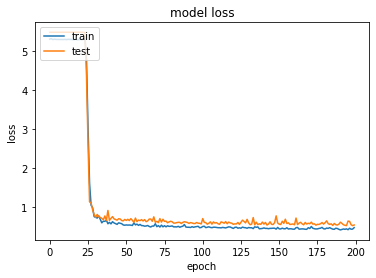

In [ ]:
#show graph
plot_model_history(history)

### Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print('Test accuracy:', test_acc)

154/154 [==============================] - 0s 45us/step
Test accuracy: 0.7792207598686218


In [ ]:
prediction = model.predict(test_data)
prediction.shape

(154, 2)

In [ ]:
prediction[1]

array([0.11911941, 0.8808806 ], dtype=float32)

In [ ]:
for i in range(5):
  print('%s => %s => expected %s' % (test_data[i].tolist(), prediction[i].tolist(), test_label[i].tolist()))

[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.43, 43.0] => [0.41894617676734924, 0.5810538530349731] => expected [0, 1]
[2.0, 112.0, 75.0, 32.0, 0.0, 35.7, 0.14800000000000002, 21.0] => [0.11911941319704056, 0.88088059425354] => expected [0, 1]
[2.0, 108.0, 64.0, 0.0, 0.0, 30.8, 0.158, 21.0] => [0.12284921854734421, 0.8771507740020752] => expected [0, 1]
[8.0, 107.0, 80.0, 0.0, 0.0, 24.6, 0.856, 34.0] => [0.15509870648384094, 0.8449012637138367] => expected [0, 1]
[7.0, 136.0, 90.0, 0.0, 0.0, 29.9, 0.21, 50.0] => [0.5206596851348877, 0.4793403148651123] => expected [0, 1]


In [ ]:
# Creating pandas dataframe from numpy array
 	 	 	 	 	 	 	
result = pd.DataFrame({'Pregnancies': test_data[:, 0], 
                       'Glucose': test_data[:, 1],
                       'BloodPressure': test_data[:, 2],
                       'SkinThickness': test_data[:, 3],
                       'Insulin': test_data[:, 4],
                       'BMI': test_data[:, 5],
                       'DiabetesPedigreeFunction': test_data[:, 6],
                       'Age': test_data[:, 7],
                       'Prediction-yes': prediction[:, 0],
                       'Prediction-no': prediction[:, 1],
                       'Diabetes-yes': test_label[:, 0],
                       'Diabetes-no': test_label[:, 1]}
                      )
print(result)

     Pregnancies  Glucose  ...  Diabetes-yes  Diabetes-no
0            6.0     98.0  ...             0            1
1            2.0    112.0  ...             0            1
2            2.0    108.0  ...             0            1
3            8.0    107.0  ...             0            1
4            7.0    136.0  ...             0            1
..           ...      ...  ...           ...          ...
149          9.0    165.0  ...             1            0
150          1.0     77.0  ...             0            1
151          8.0     95.0  ...             0            1
152          2.0    146.0  ...             1            0
153          8.0     74.0  ...             0            1

[154 rows x 12 columns]


In [ ]:
result.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediction-yes,Prediction-no,Diabetes-yes,Diabetes-no
0,6.0,98.0,58.0,33.0,190.0,34.0,0.430,43.0,0.418946,0.581054,0,1
1,2.0,112.0,75.0,32.0,0.0,35.7,0.148,21.0,0.119119,0.880881,0,1
2,2.0,108.0,64.0,0.0,0.0,30.8,0.158,21.0,0.122849,0.877151,0,1
3,8.0,107.0,80.0,0.0,0.0,24.6,0.856,34.0,0.155099,0.844901,0,1
4,7.0,136.0,90.0,0.0,0.0,29.9,0.210,50.0,0.520660,0.479340,0,1
